In [ ]:
import pandas as pd
KGO = pd.read_csv('KGO Station 426468 combined.csv', parse_dates=['5 Minutes'])
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv', parse_dates=['5 Minutes'])

KGO.set_index('5 Minutes', inplace=True)
oppo_KGO.set_index('5 Minutes', inplace=True)

In [ ]:
KGO.head()

,Lane 1 Flow (Veh/5 Minutes),Lane 1 Delay(60) (Veh-Hours),Lane 2 Flow (Veh/5 Minutes),Lane 2 Delay(60) (Veh-Hours),Lane 3 Flow (Veh/5 Minutes),Lane 3 Delay(60) (Veh-Hours),Flow (Veh/5 Minutes),Delay (V_t=60) (Veh-Hours),# Lane Points,% Observed
5 Minutes,,,,,,,,,,
2024-01-01 00:00:00,7,0.0,21,0.0,22,0.0,50,0.0,3,0
2024-01-01 00:05:00,7,0.0,21,0.0,22,0.0,50,0.0,3,0
2024-01-01 00:10:00,8,0.0,22,0.0,23,0.0,53,0.0,3,0
2024-01-01 00:15:00,12,0.0,25,0.0,25,0.0,62,0.0,3,0
2024-01-01 00:20:00,12,0.0,25,0.0,25,0.0,62,0.0,3,0


In [ ]:
oppo_KGO.head()

,Lane 1 Flow (Veh/5 Minutes),Lane 1 Delay(60) (Veh-Hours),Lane 2 Flow (Veh/5 Minutes),Lane 2 Delay(60) (Veh-Hours),Lane 3 Flow (Veh/5 Minutes),Lane 3 Delay(60) (Veh-Hours),Flow (Veh/5 Minutes),Delay (V_t=60) (Veh-Hours),# Lane Points,% Observed
5 Minutes,,,,,,,,,,
2024-01-01 00:00:00,26,0.0,43,0.0,30,0.0,99,0.0,3,0
2024-01-01 00:05:00,25,0.0,41,0.0,29,0.0,95,0.0,3,0
2024-01-01 00:10:00,24,0.0,40,0.0,28,0.0,92,0.0,3,0
2024-01-01 00:15:00,23,0.0,37,0.0,26,0.0,86,0.0,3,0
2024-01-01 00:20:00,22,0.0,36,0.0,25,0.0,83,0.0,3,0


In [ ]:
# Define delay metric
def total_delay(df):
    return df['Delay (V_t=60) (Veh-Hours)'].sum()

# reallocate 1 lane from opposite direction during morning peak (7am–10am)
def simulate_shift(df_main, df_oppo, start_time, end_time):
    # Copy to avoid altering original data
    df_main_sim = df_main.copy()
    df_oppo_sim = df_oppo.copy()

    # Time filter
    peak = (df_main_sim.index.time >= start_time) & (df_main_sim.index.time < end_time)

    # Assume we add lane 1 from opposite direction to main, remove lane 1 from opposite
    df_main_sim.loc[peak, 'Flow (Veh/5 Minutes)'] += df_oppo_sim.loc[peak, 'Lane 1 Flow (Veh/5 Minutes)']
    df_main_sim.loc[peak, 'Delay (V_t=60) (Veh-Hours)'] *= 0.8  # Assume 20% delay reduction with added capacity

    df_oppo_sim.loc[peak, 'Flow (Veh/5 Minutes)'] -= df_oppo_sim.loc[peak, 'Lane 1 Flow (Veh/5 Minutes)']
    df_oppo_sim.loc[peak, 'Delay (V_t=60) (Veh-Hours)'] *= 1.2  # Assume 20% delay increase due to loss of a lane

    return total_delay(df_main_sim), total_delay(df_oppo_sim)

# Baseline delays
baseline_main = total_delay(KGO)
baseline_oppo = total_delay(oppo_KGO)

# Simulate morning and evening peak shift
delay_morning_main, delay_morning_oppo = simulate_shift(KGO, oppo_KGO, start_time=pd.to_datetime("07:00").time(), end_time=pd.to_datetime("10:00").time())
delay_evening_oppo, delay_evening_main = simulate_shift(oppo_KGO, KGO, start_time=pd.to_datetime("15:30").time(), end_time=pd.to_datetime("19:00").time())

# Print results
print(f"Baseline Total Delay: {baseline_main + baseline_oppo:.2f} veh-hours")
print(f"Post-Morning Shift Delay: {delay_morning_main + delay_morning_oppo:.2f} veh-hours")
print(f"Post-Evening Shift Delay: {delay_evening_main + delay_evening_oppo:.2f} veh-hours")

Baseline Total Delay: 5835.90 veh-hours
Post-Morning Shift Delay: 5531.58 veh-hours
Post-Evening Shift Delay: 5260.26 veh-hours


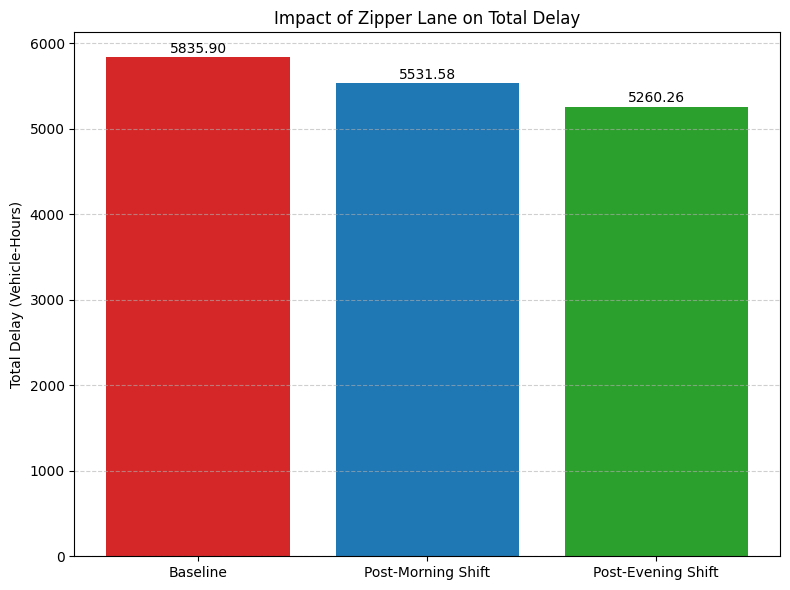

In [ ]:
import matplotlib.pyplot as plt

# Total delays
baseline_delay = baseline_main + baseline_oppo
morning_shift_delay = delay_morning_main + delay_morning_oppo
evening_shift_delay = delay_evening_main + delay_evening_oppo

# Labels and values
labels = ['Baseline', 'Post-Morning Shift', 'Post-Evening Shift']
delays = [baseline_delay, morning_shift_delay, evening_shift_delay]
colors = ['#d62728', '#1f77b4', '#2ca02c']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, delays, color=colors)
plt.ylabel('Total Delay (Vehicle-Hours)')
plt.title('Impact of Zipper Lane on Total Delay')

# Annotate the bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the data
KGO = pd.read_csv('KGO Station 426468 combined.csv')
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv')

# Clean column names
KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()

# Standardize time column
KGO = KGO.rename(columns={'5 Minutes': 'Time'})
oppo_KGO = oppo_KGO.rename(columns={'5 Minutes': 'Time'})

# Convert to datetime
KGO['Time'] = pd.to_datetime(KGO['Time'])
oppo_KGO['Time'] = pd.to_datetime(oppo_KGO['Time'])

# Calculate total delay for each direction
KGO['Total Delay_EW'] = (
    KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    KGO['Lane 3 Delay(60) (Veh-Hours)']
)

oppo_KGO['Total Delay_WE'] = (
    oppo_KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 3 Delay(60) (Veh-Hours)']
)

# Merge on Time
df = pd.merge(KGO[['Time', 'Total Delay_EW']], oppo_KGO[['Time', 'Total Delay_WE']], on='Time')
df['Hour'] = df['Time'].dt.hour

# Define time periods
def get_period(hour):
    if 6 <= hour < 10:
        return 'AM'
    elif 15 <= hour < 19:
        return 'PM'
    else:
        return 'OffPeak'

df['Period'] = df['Hour'].apply(get_period)

# Define congestion levels
def get_congestion_level(delay):
    if delay < 0.1:
        return 'low'
    elif delay < 0.5:
        return 'moderate'
    else:
        return 'high'

df['EW_cong'] = df['Total Delay_EW'].apply(get_congestion_level)
df['WE_cong'] = df['Total Delay_WE'].apply(get_congestion_level)

# Define traffic state
df['state'] = list(zip(df['Period'], df['EW_cong'], df['WE_cong']))

# Simulate control actions
state_actions = {}
for state in df['state'].unique():
    # Filter rows matching this state
    subset = df[df['state'] == state]
    avg_EW = subset['Total Delay_EW'].mean()
    avg_WE = subset['Total Delay_WE'].mean()

    actions = {
        'shift_EW': avg_EW * 0.85 + avg_WE * 1.05,
        'shift_WE': avg_EW * 1.05 + avg_WE * 0.85,
        'hold': avg_EW + avg_WE
    }

    for action, total_delay in actions.items():
        state_actions[(state, action)] = total_delay

# Sort by lowest total delay
best_actions = sorted(state_actions.items(), key=lambda x: x[1])

# Display top recommended actions
print("Top 10 Optimal State-Actions (Lowest Delay):")
for (state, action), delay in best_actions[:10]:
    print(f"State: {state}, Action: {action}, Total Delay: {delay:.2f} veh-hours")


Top 10 Optimal State-Actions (Lowest Delay):
State: ('OffPeak', 'low', 'low'), Action: shift_EW, Total Delay: 0.00 veh-hours
State: ('OffPeak', 'low', 'low'), Action: shift_WE, Total Delay: 0.00 veh-hours
State: ('OffPeak', 'low', 'low'), Action: hold, Total Delay: 0.00 veh-hours
State: ('AM', 'low', 'low'), Action: shift_EW, Total Delay: 0.00 veh-hours
State: ('AM', 'low', 'low'), Action: shift_WE, Total Delay: 0.00 veh-hours
State: ('AM', 'low', 'low'), Action: hold, Total Delay: 0.00 veh-hours
State: ('PM', 'low', 'low'), Action: shift_EW, Total Delay: 0.00 veh-hours
State: ('PM', 'low', 'low'), Action: shift_WE, Total Delay: 0.00 veh-hours
State: ('PM', 'low', 'low'), Action: hold, Total Delay: 0.00 veh-hours
State: ('PM', 'moderate', 'low'), Action: shift_EW, Total Delay: 0.09 veh-hours


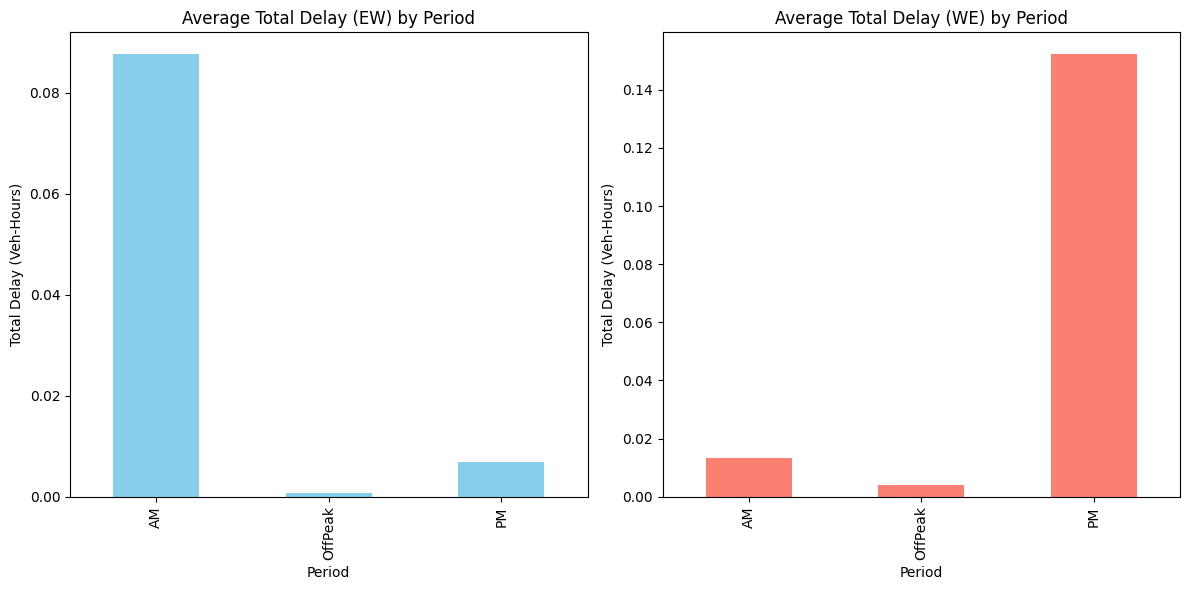

In [ ]:
import matplotlib.pyplot as plt


KGO['Time'] = pd.to_datetime(KGO['Time'])
oppo_KGO['Time'] = pd.to_datetime(oppo_KGO['Time'])

# Calculate total delay for each direction
KGO['Total Delay_EW'] = (
    KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    KGO['Lane 3 Delay(60) (Veh-Hours)']
)

oppo_KGO['Total Delay_WE'] = (
    oppo_KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 3 Delay(60) (Veh-Hours)']
)

df = pd.merge(KGO[['Time', 'Total Delay_EW']], oppo_KGO[['Time', 'Total Delay_WE']], on='Time')
df['Hour'] = df['Time'].dt.hour

def get_period(hour):
    if 6 <= hour < 10:
        return 'AM'
    elif 15 <= hour < 19:
        return 'PM'
    else:
        return 'OffPeak'

df['Period'] = df['Hour'].apply(get_period)

# Define congestion levels
def get_congestion_level(delay):
    if delay < 0.1:
        return 'low'
    elif delay < 0.5:
        return 'moderate'
    else:
        return 'high'

df['EW_cong'] = df['Total Delay_EW'].apply(get_congestion_level)
df['WE_cong'] = df['Total Delay_WE'].apply(get_congestion_level)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df.groupby('Period')['Total Delay_EW'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Total Delay (EW) by Period')
plt.xlabel('Period')
plt.ylabel('Total Delay (Veh-Hours)')

plt.subplot(1, 2, 2)
df.groupby('Period')['Total Delay_WE'].mean().plot(kind='bar', color='salmon')
plt.title('Average Total Delay (WE) by Period')
plt.xlabel('Period')
plt.ylabel('Total Delay (Veh-Hours)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Define delay metric
def total_delay(df):
    return df['Delay (V_t=60) (Veh-Hours)'].sum()

# Simulate lane shift for a given time window
def simulate_shift(df_main, df_oppo, start_time, end_time, flow_column='Lane 1 Flow (Veh/5 Minutes)', delay_column='Delay (V_t=60) (Veh-Hours)', reduction_factor=0.8, increase_factor=1.2):
    df_main_sim = df_main.copy()
    df_oppo_sim = df_oppo.copy()

    peak = (df_main_sim.index.time >= start_time) & (df_main_sim.index.time < end_time)

    df_main_sim.loc[peak, 'Flow (Veh/5 Minutes)'] += df_oppo_sim.loc[peak, flow_column]
    df_main_sim.loc[peak, delay_column] *= reduction_factor

    df_oppo_sim.loc[peak, 'Flow (Veh/5 Minutes)'] -= df_oppo_sim.loc[peak, flow_column]
    df_oppo_sim.loc[peak, delay_column] *= increase_factor

    return df_main_sim, df_oppo_sim

KGO = pd.read_csv('KGO Station 426468 combined.csv')
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv')

KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()
KGO['Time'] = pd.to_datetime(KGO['5 Minutes'])
oppo_KGO['Time'] = pd.to_datetime(oppo_KGO['5 Minutes'])

KGO.set_index('Time', inplace=True)
oppo_KGO.set_index('Time', inplace=True)

# Baseline delay
baseline_main = total_delay(KGO)
baseline_oppo = total_delay(oppo_KGO)
baseline_total = baseline_main + baseline_oppo

# Step 1: Morning shift (WE ➜ EW, 7:00–10:00)
KGO_morning, oppo_morning = simulate_shift(
    KGO, oppo_KGO,
    start_time=pd.to_datetime("07:00").time(),
    end_time=pd.to_datetime("10:00").time()
)

# Step 2: Evening shift (EW ➜ WE, 15:30–19:00)
oppo_final, KGO_final = simulate_shift(
    oppo_morning, KGO_morning,
    start_time=pd.to_datetime("15:30").time(),
    end_time=pd.to_datetime("19:00").time()
)

# Final delay totals
delay_main_combined = total_delay(KGO_final)
delay_oppo_combined = total_delay(oppo_final)
combined_total = delay_main_combined + delay_oppo_combined

# Print results
print(f"Baseline Total Delay: {baseline_total:.2f} veh-hours")
print(f"Post Full-Day Zipper Lane Shift Delay: {combined_total:.2f} veh-hours")
print(f"Net Delay Reduction: {baseline_total - combined_total:.2f} veh-hours")


Baseline Total Delay: 5835.90 veh-hours
Post Full-Day Zipper Lane Shift Delay: 4955.94 veh-hours
Net Delay Reduction: 879.96 veh-hours


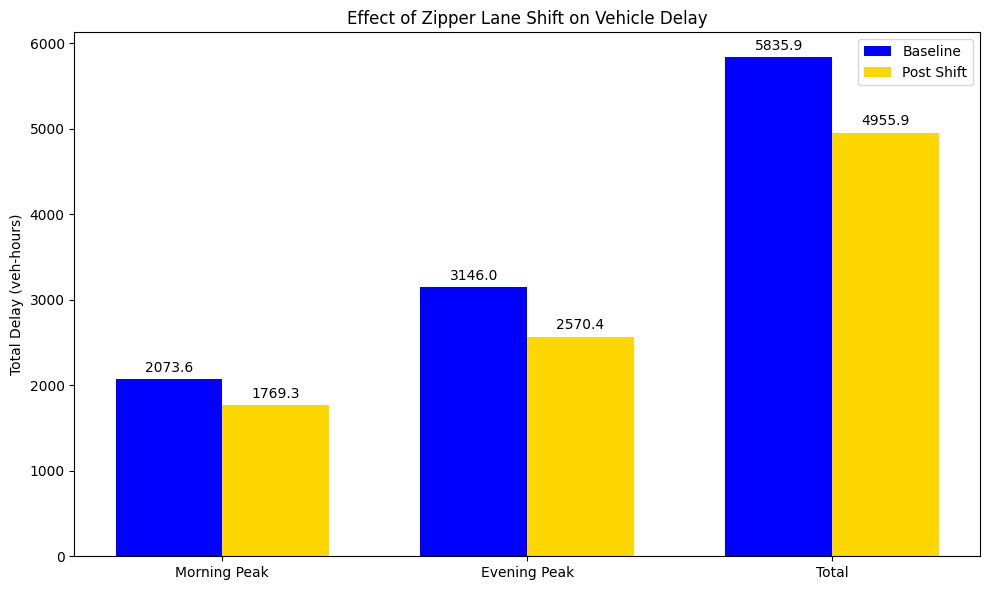

In [ ]:
import matplotlib.pyplot as plt

# Define time periods
morning_start = pd.to_datetime("07:00").time()
morning_end = pd.to_datetime("10:00").time()
evening_start = pd.to_datetime("15:30").time()
evening_end = pd.to_datetime("19:00").time()

# Helper to filter delay in a time window
def compute_delay_in_window(df, start, end):
    mask = (df.index.time >= start) & (df.index.time < end)
    return df.loc[mask, 'Delay (V_t=60) (Veh-Hours)'].sum()

# Compute delays by period
baseline_morning = compute_delay_in_window(KGO, morning_start, morning_end) + compute_delay_in_window(oppo_KGO, morning_start, morning_end)
baseline_evening = compute_delay_in_window(KGO, evening_start, evening_end) + compute_delay_in_window(oppo_KGO, evening_start, evening_end)

post_morning = compute_delay_in_window(KGO_morning, morning_start, morning_end) + compute_delay_in_window(oppo_morning, morning_start, morning_end)
post_evening = compute_delay_in_window(KGO_final, evening_start, evening_end) + compute_delay_in_window(oppo_final, evening_start, evening_end)

# Data for bar chart
labels = ['Morning Peak', 'Evening Peak', 'Total']
baseline_values = [baseline_morning, baseline_evening, baseline_total]
post_shift_values = [post_morning, post_evening, combined_total]

x = np.arange(len(labels))  # label locations
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline', color='blue')
bars2 = ax.bar(x + width/2, post_shift_values, width, label='Post Shift', color='gold')

# Labels and title
ax.set_ylabel('Total Delay (veh-hours)')
ax.set_title('Effect of Zipper Lane Shift on Vehicle Delay')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate bars with delay values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset text
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Define states (Period, EW congestion, WE congestion)
periods = ['AM', 'PM', 'OffPeak']
levels = ['low', 'moderate', 'high']
states = [(p, ew, we) for p in periods for ew in levels for we in levels]

actions = ['shift_EW', 'shift_WE', 'hold']

def get_congestion_level(delay):
    if delay < 0.1:
        return 'low'
    elif delay < 0.5:
        return 'moderate'
    else:
        return 'high'

# Load and preprocess data
KGO = pd.read_csv('KGO Station 426468 combined.csv')
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv')

KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()
KGO['Time'] = pd.to_datetime(KGO['5 Minutes'])
oppo_KGO['Time'] = pd.to_datetime(oppo_KGO['5 Minutes'])

KGO['Total Delay_EW'] = KGO[['Lane 1 Delay(60) (Veh-Hours)', 'Lane 2 Delay(60) (Veh-Hours)', 'Lane 3 Delay(60) (Veh-Hours)']].sum(axis=1)
oppo_KGO['Total Delay_WE'] = oppo_KGO[['Lane 1 Delay(60) (Veh-Hours)', 'Lane 2 Delay(60) (Veh-Hours)', 'Lane 3 Delay(60) (Veh-Hours)']].sum(axis=1)

# Merge
merged = pd.merge(KGO[['Time', 'Total Delay_EW']], oppo_KGO[['Time', 'Total Delay_WE']], on='Time')
merged['Hour'] = merged['Time'].dt.hour

# Assign period
merged['Period'] = merged['Hour'].apply(lambda h: 'AM' if 6 <= h < 10 else ('PM' if 15 <= h < 19 else 'OffPeak'))

# Assign congestion level
merged['EW_cong'] = merged['Total Delay_EW'].apply(get_congestion_level)
merged['WE_cong'] = merged['Total Delay_WE'].apply(get_congestion_level)

# State
merged['State'] = list(zip(merged['Period'], merged['EW_cong'], merged['WE_cong']))

# Estimate rewards
state_action_rewards = {}
for state in states:
    subset = merged[merged['State'] == state]
    if subset.empty:
        continue
    avg_EW = subset['Total Delay_EW'].mean()
    avg_WE = subset['Total Delay_WE'].mean()

    # Delay estimates for each action
    delay_shift_EW = avg_EW * 0.85 + avg_WE * 1.05
    delay_shift_WE = avg_EW * 1.05 + avg_WE * 0.85
    delay_hold = avg_EW + avg_WE

    state_action_rewards[(state, 'shift_EW')] = -delay_shift_EW
    state_action_rewards[(state, 'shift_WE')] = -delay_shift_WE
    state_action_rewards[(state, 'hold')] = -delay_hold

# Placeholder transition function: deterministic self-transition
transition_probs = {(s, a): {s: 1.0} for s in states for a in actions if (s, a) in state_action_rewards}

def value_iteration(states, actions, rewards, transitions, gamma=0.95, theta=1e-3):
    V = defaultdict(float)
    policy = {}

    while True:
        delta = 0
        for s in states:
            action_values = []
            for a in actions:
                if (s, a) not in rewards:
                    continue
                v = 0
                for s_prime, prob in transitions.get((s, a), {}).items():
                    v += prob * (rewards[(s, a)] + gamma * V[s_prime])
                action_values.append((v, a))

            if action_values:
                best_v, best_a = max(action_values)
                delta = max(delta, abs(best_v - V[s]))
                V[s] = best_v
                policy[s] = best_a

        if delta < theta:
            break

    return policy, V

# Run value iteration
optimal_policy, state_values = value_iteration(states, actions, state_action_rewards, transition_probs)

# Print optimal actions for each state
print("Optimal Policy:")
for state in sorted(optimal_policy):
    print(f"State: {state}, Action: {optimal_policy[state]}")


Optimal Policy:
State: ('AM', 'high', 'low'), Action: shift_EW
State: ('AM', 'high', 'moderate'), Action: shift_EW
State: ('AM', 'low', 'high'), Action: shift_WE
State: ('AM', 'low', 'low'), Action: shift_WE
State: ('AM', 'low', 'moderate'), Action: shift_WE
State: ('AM', 'moderate', 'high'), Action: shift_WE
State: ('AM', 'moderate', 'low'), Action: shift_EW
State: ('AM', 'moderate', 'moderate'), Action: shift_WE
State: ('OffPeak', 'high', 'high'), Action: shift_WE
State: ('OffPeak', 'high', 'low'), Action: shift_EW
State: ('OffPeak', 'low', 'high'), Action: shift_WE
State: ('OffPeak', 'low', 'low'), Action: shift_WE
State: ('OffPeak', 'low', 'moderate'), Action: shift_WE
State: ('OffPeak', 'moderate', 'low'), Action: shift_EW
State: ('OffPeak', 'moderate', 'moderate'), Action: shift_WE
State: ('PM', 'high', 'high'), Action: shift_WE
State: ('PM', 'low', 'high'), Action: shift_WE
State: ('PM', 'low', 'low'), Action: shift_WE
State: ('PM', 'low', 'moderate'), Action: shift_WE
State: ('

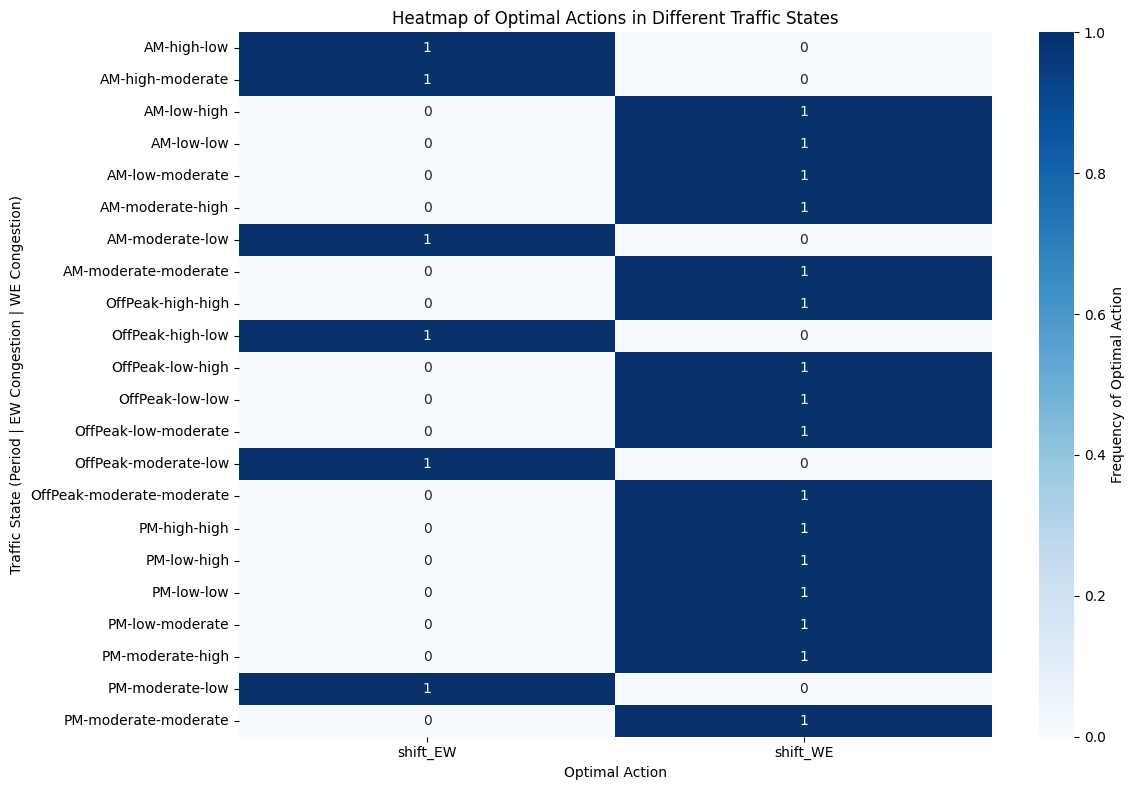

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create an empty list to hold rows
policy_rows = []

# Convert states into readable format for visualization
for state in optimal_policy:
    period, ew_cong, we_cong = state
    optimal_action = optimal_policy[state]
    policy_rows.append({
        'Period': period,
        'EW Congestion': ew_cong,
        'WE Congestion': we_cong,
        'Optimal Action': optimal_action
    })

# Convert the list of rows into a DataFrame
policy_df = pd.DataFrame(policy_rows)

# Pivot table to create matrix format for heatmap (rows = states, columns = optimal actions)
pivot = policy_df.pivot_table(index=['Period', 'EW Congestion', 'WE Congestion'], columns='Optimal Action', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Frequency of Optimal Action'})
plt.title('Heatmap of Optimal Actions in Different Traffic States')
plt.ylabel('Traffic State (Period | EW Congestion | WE Congestion)')
plt.xlabel('Optimal Action')
plt.tight_layout()
plt.show()


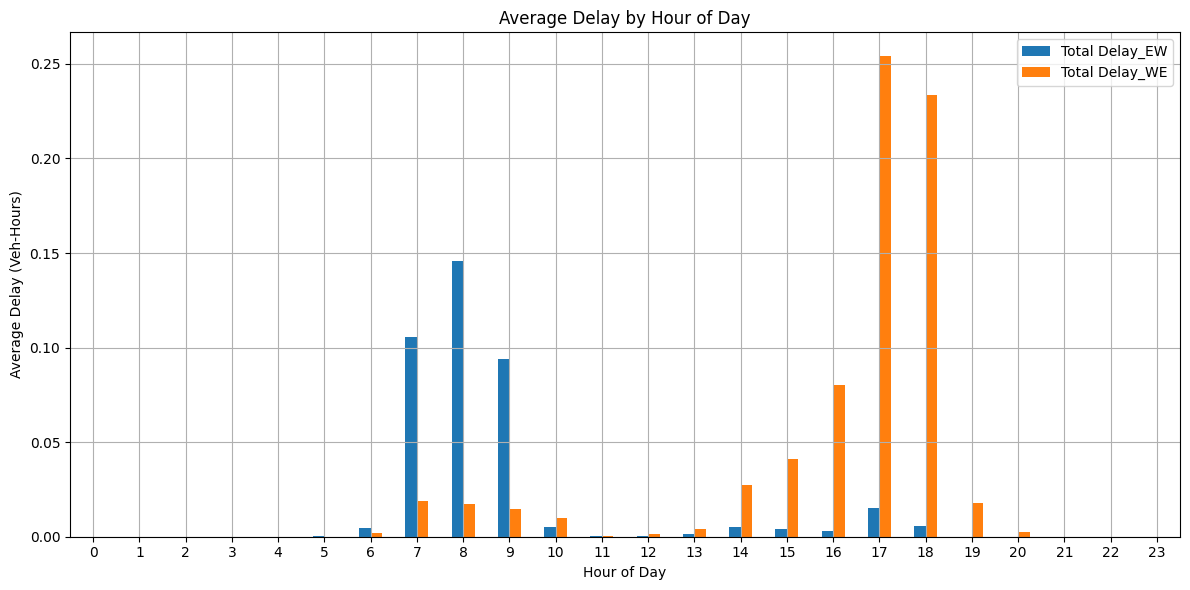

In [ ]:
import matplotlib.pyplot as plt

# Extract hour of day for plotting
time_states['HourOfDay'] = time_states['Hour'].dt.hour

# Group by hour of day
avg_delays_by_hour = time_states.groupby('HourOfDay')[['Total Delay_EW', 'Total Delay_WE']].mean()

# Plot
avg_delays_by_hour.plot(kind='bar', figsize=(12, 6), title='Average Delay by Hour of Day')
plt.ylabel('Average Delay (Veh-Hours)')
plt.xlabel('Hour of Day')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

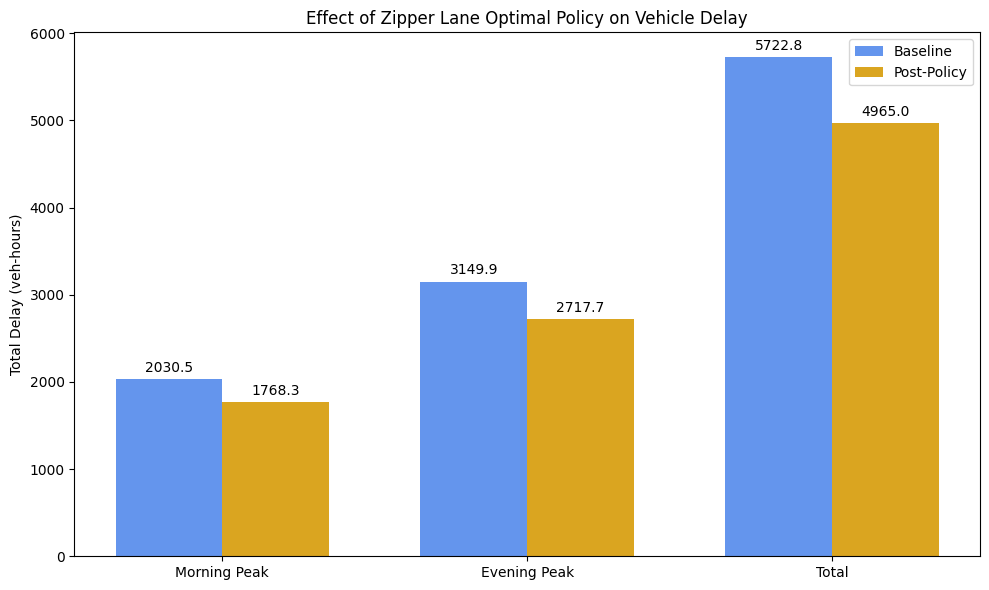

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
KGO = pd.read_csv('KGO Station 426468 combined.csv', parse_dates=['5 Minutes'])
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv', parse_dates=['5 Minutes'])

KGO.set_index('5 Minutes', inplace=True)
oppo_KGO.set_index('5 Minutes', inplace=True)

# Clean column names
KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()

# Combine delay columns into Total Delay
KGO['Total Delay_EW'] = KGO[['Lane 1 Delay(60) (Veh-Hours)',
                             'Lane 2 Delay(60) (Veh-Hours)',
                             'Lane 3 Delay(60) (Veh-Hours)']].sum(axis=1)
oppo_KGO['Total Delay_WE'] = oppo_KGO[['Lane 1 Delay(60) (Veh-Hours)',
                                       'Lane 2 Delay(60) (Veh-Hours)',
                                       'Lane 3 Delay(60) (Veh-Hours)']].sum(axis=1)

# Merge both directions on time
merged = pd.merge(KGO[['Total Delay_EW']], oppo_KGO[['Total Delay_WE']],
                  left_index=True, right_index=True)

# ---------------------------
# Apply Optimal Policy Rules
# ---------------------------
def classify_period_and_level(row):
    t = row.name.time()
    ew = row['Total Delay_EW']
    we = row['Total Delay_WE']

    # Time of day classification
    if t >= pd.to_datetime("07:00").time() and t < pd.to_datetime("10:00").time():
        period = 'AM'
    elif t >= pd.to_datetime("15:30").time() and t < pd.to_datetime("19:00").time():
        period = 'PM'
    else:
        period = 'OffPeak'

    # Delay level classification
    def level(x):
        if x < 0.1:
            return 'low'
        elif x < 0.5:
            return 'moderate'
        else:
            return 'high'

    return pd.Series([period, level(ew), level(we)], index=['Period', 'EW_Level', 'WE_Level'])

merged[['Period', 'EW_Level', 'WE_Level']] = merged.apply(classify_period_and_level, axis=1)

# Define optimal policy
optimal_policy = {
    ('AM', 'high', 'low'): 'shift_EW',
    ('AM', 'low', 'low'): 'shift_EW',
    ('AM', 'low', 'moderate'): 'shift_WE',
    ('AM', 'moderate', 'low'): 'shift_EW',
    ('OffPeak', 'high', 'low'): 'shift_EW',
    ('OffPeak', 'low', 'high'): 'shift_WE',
    ('OffPeak', 'low', 'low'): 'shift_WE',
    ('OffPeak', 'low', 'moderate'): 'shift_WE',
    ('OffPeak', 'moderate', 'low'): 'shift_EW',
    ('OffPeak', 'moderate', 'moderate'): 'shift_WE',
    ('PM', 'high', 'high'): 'shift_WE',
    ('PM', 'low', 'high'): 'shift_WE',
    ('PM', 'low', 'low'): 'shift_WE',
    ('PM', 'low', 'moderate'): 'shift_WE',
    ('PM', 'moderate', 'moderate'): 'shift_WE'
}

# Apply the optimal action to each timestamp
merged['Optimal_Action'] = merged.apply(
    lambda row: optimal_policy.get((row['Period'], row['EW_Level'], row['WE_Level']), 'hold'),
    axis=1
)

# ---------------------------
# Estimate Delays After Policy
# ---------------------------
def simulate_shift(row):
    ew, we = row['Total Delay_EW'], row['Total Delay_WE']
    action = row['Optimal_Action']

    if action == 'shift_EW':
        ew *= 0.85  # reduce EW delay
        we *= 1.15  # increase WE delay
    elif action == 'shift_WE':
        ew *= 1.15
        we *= 0.85
    return ew + we

merged['Baseline_Delay'] = merged['Total Delay_EW'] + merged['Total Delay_WE']
merged['PostPolicy_Delay'] = merged.apply(simulate_shift, axis=1)

# ---------------------------
# Define Time Periods
# ---------------------------
def is_in_window(index, start, end):
    t = index.time()
    return start <= t < end

# Define peak hour windows
morning_start = pd.to_datetime("07:00").time()
morning_end = pd.to_datetime("10:00").time()
evening_start = pd.to_datetime("15:30").time()
evening_end = pd.to_datetime("19:00").time()

# Compute delay totals by period
morning_mask = merged.index.map(lambda t: is_in_window(t, morning_start, morning_end))
evening_mask = merged.index.map(lambda t: is_in_window(t, evening_start, evening_end))

baseline_morning = merged.loc[morning_mask, 'Baseline_Delay'].sum()
baseline_evening = merged.loc[evening_mask, 'Baseline_Delay'].sum()
baseline_total = merged['Baseline_Delay'].sum()

post_morning = merged.loc[morning_mask, 'PostPolicy_Delay'].sum()
post_evening = merged.loc[evening_mask, 'PostPolicy_Delay'].sum()
post_total = merged['PostPolicy_Delay'].sum()

# ---------------------------
# Plot Results
# ---------------------------
labels = ['Morning Peak', 'Evening Peak', 'Total']
baseline_values = [baseline_morning, baseline_evening, baseline_total]
post_values = [post_morning, post_evening, post_total]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline', color='cornflowerblue')
bars2 = ax.bar(x + width/2, post_values, width, label='Post-Policy', color='goldenrod')

ax.set_ylabel('Total Delay (veh-hours)')
ax.set_title('Effect of Zipper Lane Optimal Policy on Vehicle Delay')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate bar heights
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare the data
KGO = pd.read_csv('KGO Station 426468 combined.csv', parse_dates=['5 Minutes']).set_index('5 Minutes')
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv', parse_dates=['5 Minutes']).set_index('5 Minutes')

# Clean column names
KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()

# Compute total delay
KGO['Total_Delay_EW'] = KGO[['Lane 1 Delay(60) (Veh-Hours)', 'Lane 2 Delay(60) (Veh-Hours)', 'Lane 3 Delay(60) (Veh-Hours)']].sum(axis=1)
oppo_KGO['Total_Delay_WE'] = oppo_KGO[['Lane 1 Delay(60) (Veh-Hours)', 'Lane 2 Delay(60) (Veh-Hours)', 'Lane 3 Delay(60) (Veh-Hours)']].sum(axis=1)

# Merge datasets
df = pd.merge(KGO[['Total_Delay_EW']], oppo_KGO[['Total_Delay_WE']], left_index=True, right_index=True)
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek

# Target: total delay 1 hour into the future
df['Future_Delay_EW'] = df['Total_Delay_EW'].shift(-12)  # Assuming 5-minute intervals
df['Future_Delay_WE'] = df['Total_Delay_WE'].shift(-12)

# Drop rows with NaNs due to shifting
df.dropna(inplace=True)

# Features and targets
features = ['Total_Delay_EW', 'Total_Delay_WE', 'Hour', 'DayOfWeek']
X = df[features]
y_ew = df['Future_Delay_EW']
y_we = df['Future_Delay_WE']

# Train/test split
X_train, X_test, y_train_ew, y_test_ew = train_test_split(X, y_ew, test_size=0.2, random_state=42)
_, _, y_train_we, y_test_we = train_test_split(X, y_we, test_size=0.2, random_state=42)

# Train models
model_ew = RandomForestRegressor(n_estimators=100, random_state=0)
model_we = RandomForestRegressor(n_estimators=100, random_state=0)
model_ew.fit(X_train, y_train_ew)
model_we.fit(X_train, y_train_we)

# Evaluate
pred_ew = model_ew.predict(X_test)
pred_we = model_we.predict(X_test)
mse_ew = mean_squared_error(y_test_ew, pred_ew)
mse_we = mean_squared_error(y_test_we, pred_we)

print(f"🚗 EW Prediction MSE: {mse_ew:.3f}")
print(f"🚙 WE Prediction MSE: {mse_we:.3f}")

example = pd.DataFrame({
    'Total_Delay_EW': [3150],
    'Total_Delay_WE': [30.0],
    'Hour': [8],
    'DayOfWeek': [1]
})
future_delay_ew = model_ew.predict(example)[0]
future_delay_we = model_we.predict(example)[0]
print(f"\n🧭 Predicted delay 1 hour later — EW: {future_delay_ew:.2f} | WE: {future_delay_we:.2f}")


# Part 2

In [38]:
import pandas as pd
KGO = pd.read_excel('KGO.xlsx')
oppo_KGO = pd.read_excel('oppo KGO.xlsx')


In [3]:
KGO.head()

,Hour,Lane 1 Flow (Veh/Hour),Lane 1 Delay(60) (Veh-Hours),Lane 2 Flow (Veh/Hour),Lane 2 Delay(60) (Veh-Hours),Lane 3 Flow (Veh/Hour),Lane 3 Delay(60) (Veh-Hours),Flow (Veh/Hour),Delay (V_t=60) (Veh-Hours),# Lane Points,% Observed
0,2023-01-01 00:00:00,137,0.0,295,0.0,299,0.0,731,0.0,36,0
1,2023-01-01 01:00:00,166,0.0,322,0.0,317,0.0,805,0.0,36,0
2,2023-01-01 02:00:00,117,0.0,277,0.0,282,0.0,676,0.0,36,0
3,2023-01-01 03:00:00,103,0.0,265,0.0,273,0.0,641,0.0,36,0
4,2023-01-01 04:00:00,95,0.0,258,0.0,267,0.0,620,0.0,36,0


In [4]:
oppo_KGO.head()

,Hour,Lane 1 Flow (Veh/Hour),Lane 1 Delay(60) (Veh-Hours),Lane 2 Flow (Veh/Hour),Lane 2 Delay(60) (Veh-Hours),Lane 3 Flow (Veh/Hour),Lane 3 Delay(60) (Veh-Hours),Flow (Veh/Hour),Delay (V_t=60) (Veh-Hours),# Lane Points,% Observed
0,2023-01-01 00:00:00,313,0.0,523,0.0,488,0.0,1324,0.0,36,0
1,2023-01-01 01:00:00,330,0.0,537,0.0,497,0.0,1364,0.0,36,0
2,2023-01-01 02:00:00,254,0.0,471,0.0,443,0.0,1168,0.0,36,0
3,2023-01-01 03:00:00,175,0.0,404,0.0,391,0.0,970,0.0,36,0
4,2023-01-01 04:00:00,177,0.0,404,0.0,391,0.0,972,0.0,36,0


Baseline Total Delay: 13376.40 veh-hours
Post Full-Day Zipper Lane Shift Delay: 11823.02 veh-hours
Net Delay Reduction: 1553.38 veh-hours (11.61%)


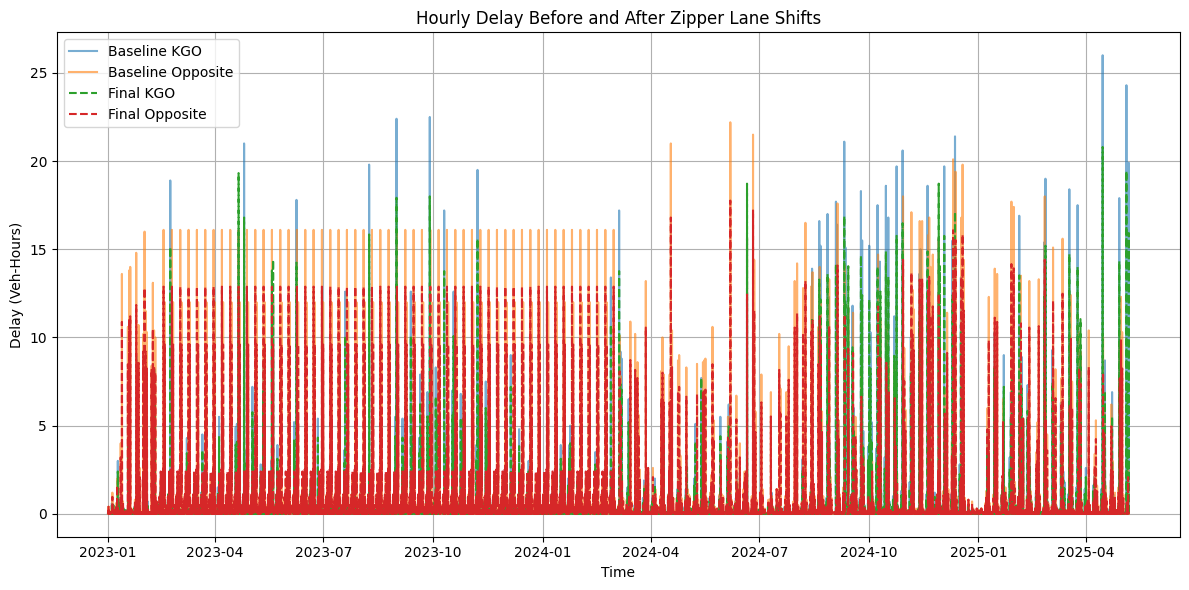

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Strip whitespace from column names
KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()

# Convert 'Hour' column to datetime and set as index
KGO['Hour'] = pd.to_datetime(KGO['Hour'])
oppo_KGO['Hour'] = pd.to_datetime(oppo_KGO['Hour'])

KGO.set_index('Hour', inplace=True)
oppo_KGO.set_index('Hour', inplace=True)

# Define delay metric
def total_delay(df):
    return df['Delay (V_t=60) (Veh-Hours)'].sum()

# Simulate lane shift for a given time window
def simulate_shift(df_main, df_oppo, start_time, end_time,
                   flow_column='Flow (Veh/Hour)',
                   delay_column='Delay (V_t=60) (Veh-Hours)',
                   reduction_factor=0.8,
                   increase_factor=1.2):
    df_main_sim = df_main.copy()
    df_oppo_sim = df_oppo.copy()

    # Create mask for the time window
    peak = (df_main_sim.index.time >= start_time) & (df_main_sim.index.time < end_time)

    # Simulate flow shift and delay adjustments
    df_main_sim.loc[peak, flow_column] += df_oppo_sim.loc[peak, flow_column]
    df_main_sim.loc[peak, delay_column] *= reduction_factor

    df_oppo_sim.loc[peak, flow_column] -= df_oppo_sim.loc[peak, flow_column]
    df_oppo_sim.loc[peak, delay_column] *= increase_factor

    return df_main_sim, df_oppo_sim

# Baseline delay
baseline_main = total_delay(KGO)
baseline_oppo = total_delay(oppo_KGO)
baseline_total = baseline_main + baseline_oppo

# Step 1: Morning shift (WE ➜ EW, 7:00–10:00)
KGO_morning, oppo_morning = simulate_shift(
    KGO, oppo_KGO,
    start_time=pd.to_datetime("07:00").time(),
    end_time=pd.to_datetime("10:00").time()
)

# Step 2: Evening shift (EW ➜ WE, 15:30–19:00)
oppo_final, KGO_final = simulate_shift(
    oppo_morning, KGO_morning,
    start_time=pd.to_datetime("15:30").time(),
    end_time=pd.to_datetime("19:00").time()
)

# Final delay totals
delay_main_combined = total_delay(KGO_final)
delay_oppo_combined = total_delay(oppo_final)
combined_total = delay_main_combined + delay_oppo_combined

# Print results
print(f"Baseline Total Delay: {baseline_total:.2f} veh-hours")
print(f"Post Full-Day Zipper Lane Shift Delay: {combined_total:.2f} veh-hours")
print(f"Net Delay Reduction: {baseline_total - combined_total:.2f} veh-hours ({100 * (baseline_total - combined_total) / baseline_total:.2f}%)")

# Optional plotting: Delay over time
plt.figure(figsize=(12, 6))
plt.plot(KGO.index, KGO['Delay (V_t=60) (Veh-Hours)'], label='Baseline KGO', alpha=0.6)
plt.plot(oppo_KGO.index, oppo_KGO['Delay (V_t=60) (Veh-Hours)'], label='Baseline Opposite', alpha=0.6)
plt.plot(KGO_final.index, KGO_final['Delay (V_t=60) (Veh-Hours)'], label='Final KGO', linestyle='--')
plt.plot(oppo_final.index, oppo_final['Delay (V_t=60) (Veh-Hours)'], label='Final Opposite', linestyle='--')

plt.title('Hourly Delay Before and After Zipper Lane Shifts')
plt.xlabel('Time')
plt.ylabel('Delay (Veh-Hours)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


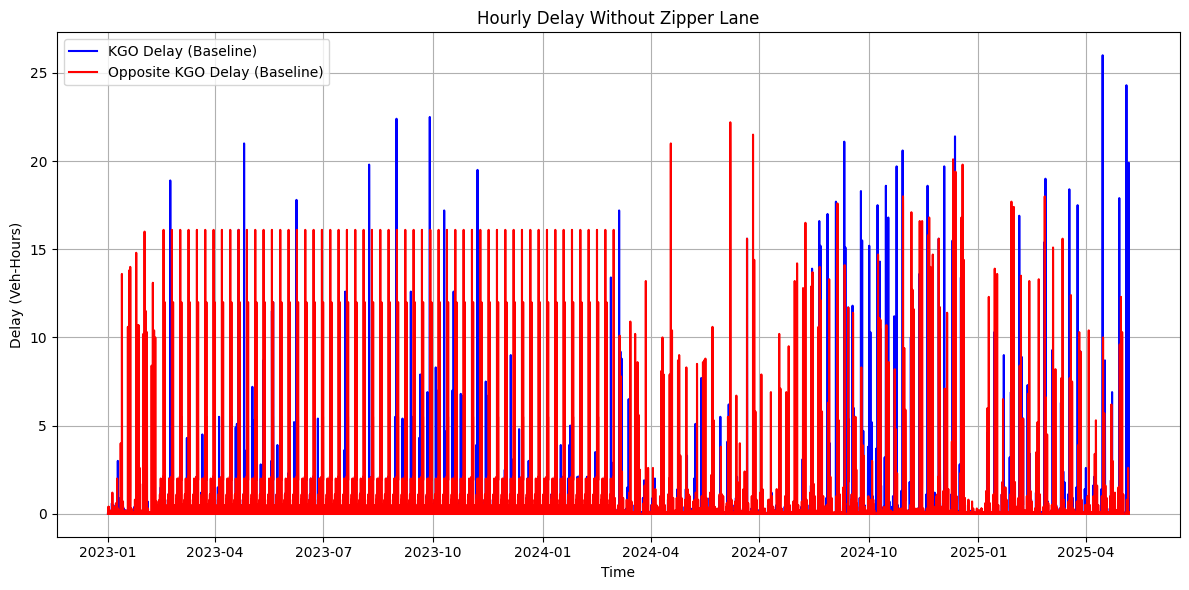

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot baseline delay
plt.figure(figsize=(12, 6))
plt.plot(KGO.index, KGO['Delay (V_t=60) (Veh-Hours)'], label='KGO Delay (Baseline)', color='blue')
plt.plot(oppo_KGO.index, oppo_KGO['Delay (V_t=60) (Veh-Hours)'], label='Opposite KGO Delay (Baseline)', color='red')

plt.title('Hourly Delay Without Zipper Lane')
plt.xlabel('Time')
plt.ylabel('Delay (Veh-Hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


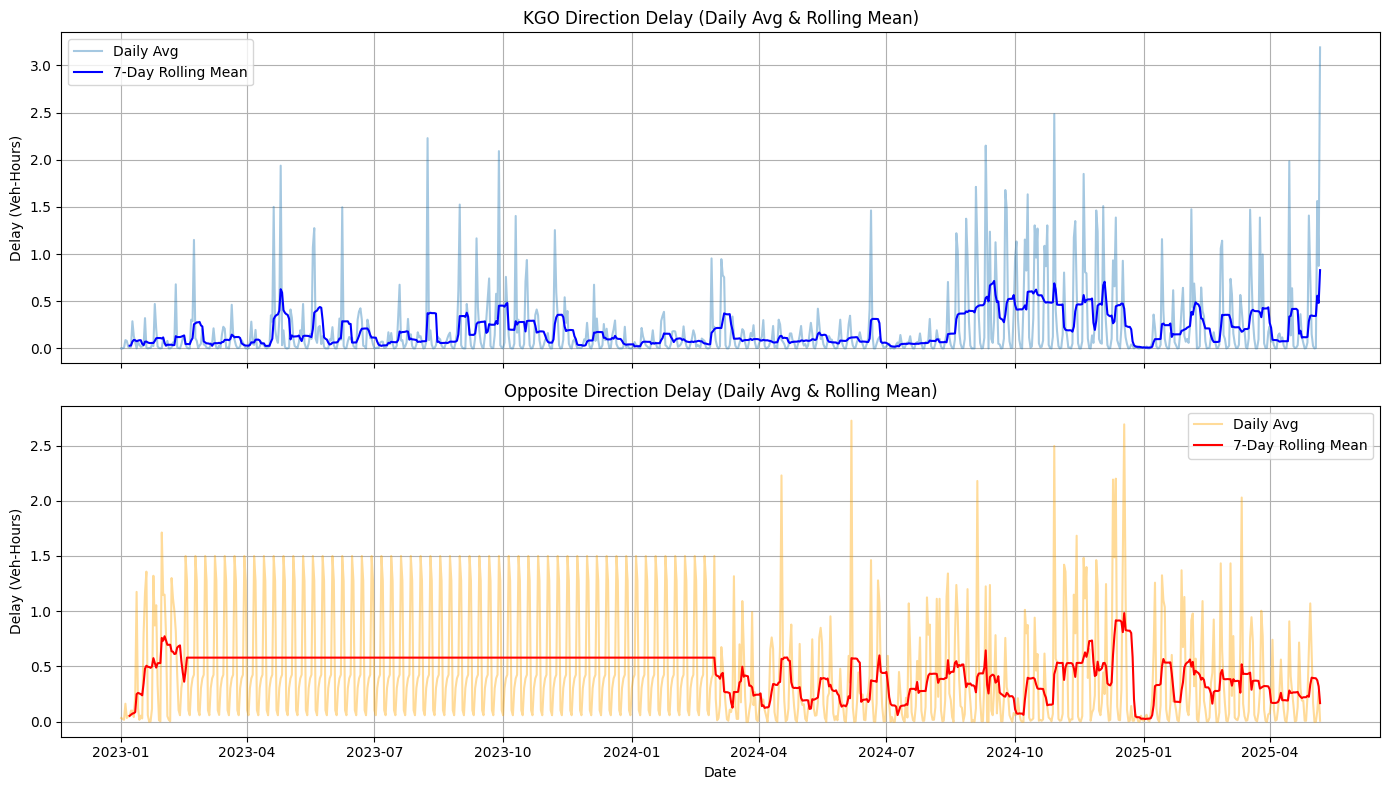

In [41]:
# Resample to daily average
KGO_daily = KGO.resample('D').mean()
oppo_daily = oppo_KGO.resample('D').mean()

# Add 7-day rolling mean
KGO_daily['Rolling Mean'] = KGO_daily['Delay (V_t=60) (Veh-Hours)'].rolling(7).mean()
oppo_daily['Rolling Mean'] = oppo_daily['Delay (V_t=60) (Veh-Hours)'].rolling(7).mean()

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# KGO plot
ax[0].plot(KGO_daily.index, KGO_daily['Delay (V_t=60) (Veh-Hours)'], alpha=0.4, label='Daily Avg')
ax[0].plot(KGO_daily.index, KGO_daily['Rolling Mean'], label='7-Day Rolling Mean', color='blue')
ax[0].set_title('KGO Direction Delay (Daily Avg & Rolling Mean)')
ax[0].set_ylabel('Delay (Veh-Hours)')
ax[0].legend()
ax[0].grid(True)

# Opposite plot
ax[1].plot(oppo_daily.index, oppo_daily['Delay (V_t=60) (Veh-Hours)'], alpha=0.4, label='Daily Avg', color='orange')
ax[1].plot(oppo_daily.index, oppo_daily['Rolling Mean'], label='7-Day Rolling Mean', color='red')
ax[1].set_title('Opposite Direction Delay (Daily Avg & Rolling Mean)')
ax[1].set_ylabel('Delay (Veh-Hours)')
ax[1].set_xlabel('Date')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import pandas as pd

# Define time steps and actions
time_steps = KGO.index
n = len(time_steps)

actions = ['hold', 'shift_EW', 'shift_WE']
gamma = 0.95  # discount factor

# Reward model: negative of total delay
def get_reward(state_index, action):
    t = time_steps[state_index]
    base_KGO = KGO.loc[t, 'Delay (V_t=60) (Veh-Hours)']
    base_oppo = oppo_KGO.loc[t, 'Delay (V_t=60) (Veh-Hours)']

    if action == 'hold':
        return -(base_KGO + base_oppo)
    elif action == 'shift_EW':  # previously shift_to_KGO
        return -(0.8 * base_KGO + 1.2 * base_oppo)
    elif action == 'shift_WE':  # previously shift_to_oppo
        return -(1.2 * base_KGO + 0.8 * base_oppo)

# Value iteration
V = np.zeros(n)
policy = []

for _ in range(50):
    new_V = np.zeros(n)
    for s in range(n):
        new_V[s] = max(
            get_reward(s, a) + (gamma * V[s + 1] if s < n - 1 else 0)
            for a in actions
        )
    if np.allclose(V, new_V):
        break
    V = new_V

# Extract policy
for s in range(n):
    best_action = max(
        actions,
        key=lambda a: get_reward(s, a) + (gamma * V[s + 1] if s < n - 1 else 0)
    )
    policy.append(best_action)

# Build schedule
optimal_schedule = pd.DataFrame({'Time': time_steps, 'Action': policy})
print(optimal_schedule.head(20))


                  Time    Action
0  2023-01-01 00:00:00      hold
1  2023-01-01 01:00:00      hold
2  2023-01-01 02:00:00      hold
3  2023-01-01 03:00:00      hold
4  2023-01-01 04:00:00      hold
5  2023-01-01 05:00:00      hold
6  2023-01-01 06:00:00      hold
7  2023-01-01 07:00:00      hold
8  2023-01-01 08:00:00      hold
9  2023-01-01 09:00:00      hold
10 2023-01-01 10:00:00      hold
11 2023-01-01 11:00:00  shift_WE
12 2023-01-01 12:00:00      hold
13 2023-01-01 13:00:00      hold
14 2023-01-01 14:00:00      hold
15 2023-01-01 15:00:00      hold
16 2023-01-01 16:00:00      hold
17 2023-01-01 17:00:00  shift_WE
18 2023-01-01 18:00:00      hold
19 2023-01-01 19:00:00      hold


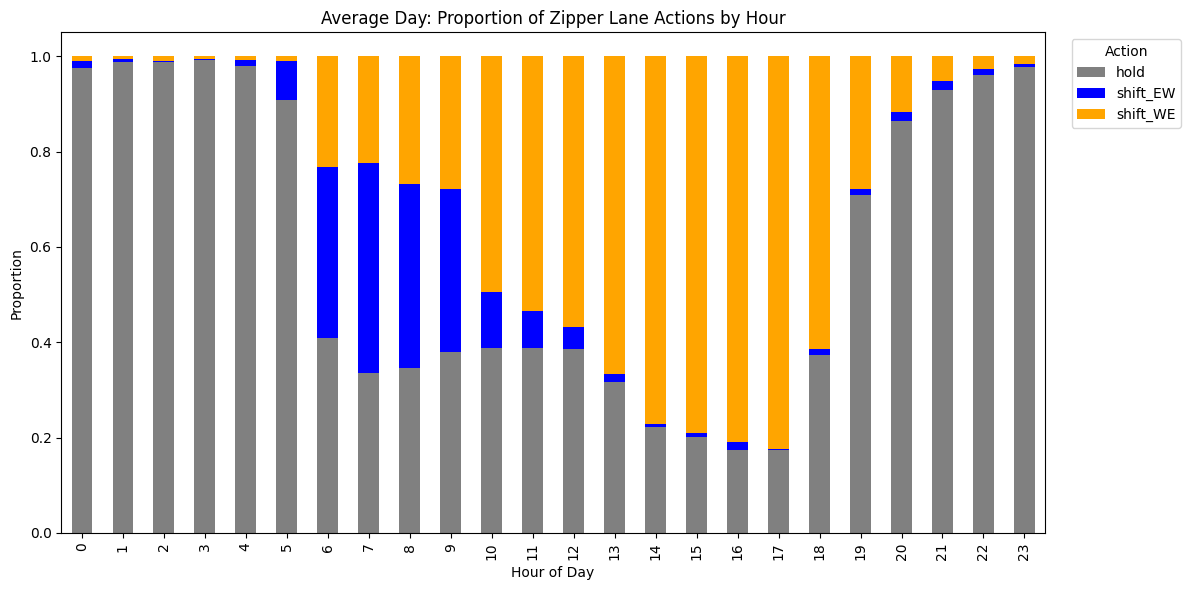

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure Time is a datetime
optimal_schedule['Time'] = pd.to_datetime(optimal_schedule['Time'])

# Extract hour
optimal_schedule['Hour'] = optimal_schedule['Time'].dt.hour

# Count occurrences of each action at each hour
hourly_action_counts = optimal_schedule.groupby(['Hour', 'Action']).size().unstack(fill_value=0)

# Normalize to get proportions
hourly_action_props = hourly_action_counts.div(hourly_action_counts.sum(axis=1), axis=0)

# Reorder columns if needed
action_order = ['hold', 'shift_EW', 'shift_WE']
hourly_action_props = hourly_action_props[action_order]

# Plot: Stacked bar chart
colors = {'hold': 'gray', 'shift_EW': 'blue', 'shift_WE': 'orange'}
hourly_action_props.plot(kind='bar', stacked=True, color=[colors[a] for a in action_order], figsize=(12, 6))

plt.title('Average Day: Proportion of Zipper Lane Actions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion')
plt.legend(title='Action', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


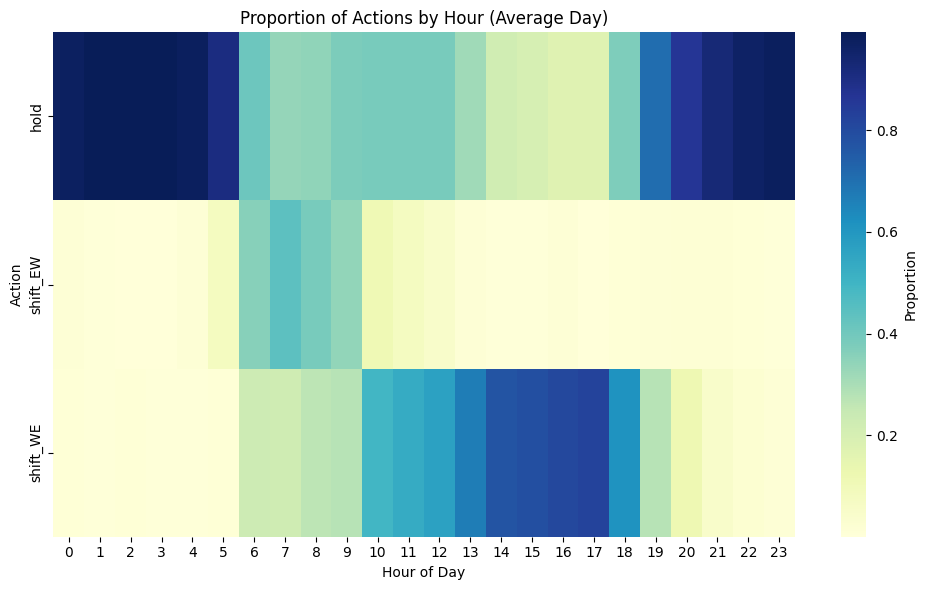

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

action_hourly_counts = optimal_schedule.groupby(['Hour', 'Action']).size().unstack(fill_value=0)

action_hourly_props = action_hourly_counts.div(action_hourly_counts.sum(axis=1), axis=0)

action_order = ['hold', 'shift_EW', 'shift_WE']
action_hourly_props = action_hourly_props.reindex(columns=action_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(action_hourly_props.T,  cmap='YlGnBu', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Actions by Hour (Average Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Action')
plt.tight_layout()
plt.show()


Morning Peak Delay Savings: 629.22 veh-hours
Evening Peak Delay Savings: 1116.88 veh-hours
Total Delay Savings: 2201.36 veh-hours


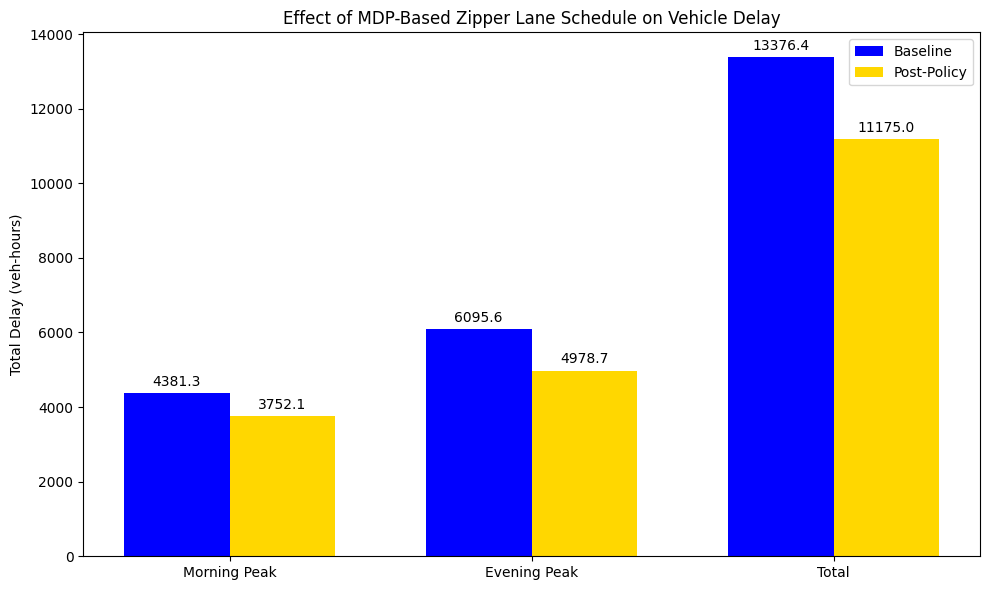

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Apply the MDP-Based Schedule to Modify Delay
# ---------------------------
KGO_sched = KGO.copy()
oppo_sched = oppo_KGO.copy()

# Apply MDP actions
for i, row in optimal_schedule.iterrows():
    t = row['Time']
    act = row['Action']

    if act == 'shift_EW':  # shift toward KGO
        KGO_sched.loc[t, 'Delay (V_t=60) (Veh-Hours)'] *= 0.8
        oppo_sched.loc[t, 'Delay (V_t=60) (Veh-Hours)'] *= 1.2
    elif act == 'shift_WE':  # shift toward opposing direction
        KGO_sched.loc[t, 'Delay (V_t=60) (Veh-Hours)'] *= 1.2
        oppo_sched.loc[t, 'Delay (V_t=60) (Veh-Hours)'] *= 0.8
    # 'hold' does nothing

# ---------------------------
# Compute Delay Sums for Periods
# ---------------------------
def is_in_window(index, start, end):
    t = index.time()
    return start <= t < end

morning_start = pd.to_datetime("07:00").time()
morning_end = pd.to_datetime("10:00").time()
evening_start = pd.to_datetime("15:30").time()
evening_end = pd.to_datetime("19:00").time()

# Apply masks
morning_mask = KGO.index.map(lambda t: is_in_window(t, morning_start, morning_end))
evening_mask = KGO.index.map(lambda t: is_in_window(t, evening_start, evening_end))

# Sum delays
baseline_morning = KGO.loc[morning_mask, 'Delay (V_t=60) (Veh-Hours)'].sum() + \
                   oppo_KGO.loc[morning_mask, 'Delay (V_t=60) (Veh-Hours)'].sum()
baseline_evening = KGO.loc[evening_mask, 'Delay (V_t=60) (Veh-Hours)'].sum() + \
                   oppo_KGO.loc[evening_mask, 'Delay (V_t=60) (Veh-Hours)'].sum()
baseline_total = KGO['Delay (V_t=60) (Veh-Hours)'].sum() + \
                 oppo_KGO['Delay (V_t=60) (Veh-Hours)'].sum()

post_morning = KGO_sched.loc[morning_mask, 'Delay (V_t=60) (Veh-Hours)'].sum() + \
               oppo_sched.loc[morning_mask, 'Delay (V_t=60) (Veh-Hours)'].sum()
post_evening = KGO_sched.loc[evening_mask, 'Delay (V_t=60) (Veh-Hours)'].sum() + \
               oppo_sched.loc[evening_mask, 'Delay (V_t=60) (Veh-Hours)'].sum()
post_total = KGO_sched['Delay (V_t=60) (Veh-Hours)'].sum() + \
             oppo_sched['Delay (V_t=60) (Veh-Hours)'].sum()

# ---------------------------
# Print Delay Savings
# ---------------------------
morning_savings = baseline_morning - post_morning
evening_savings = baseline_evening - post_evening
total_savings = baseline_total - post_total

print(f"Morning Peak Delay Savings: {morning_savings:.2f} veh-hours")
print(f"Evening Peak Delay Savings: {evening_savings:.2f} veh-hours")
print(f"Total Delay Savings: {total_savings:.2f} veh-hours")

# ---------------------------
# Plot Before vs After Comparison
# ---------------------------
labels = ['Morning Peak', 'Evening Peak', 'Total']
baseline_values = [baseline_morning, baseline_evening, baseline_total]
post_values = [post_morning, post_evening, post_total]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline', color='blue')
bars2 = ax.bar(x + width/2, post_values, width, label='Post-Policy', color='gold')

ax.set_ylabel('Total Delay (veh-hours)')
ax.set_title('Effect of MDP-Based Zipper Lane Schedule on Vehicle Delay')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Annotate values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


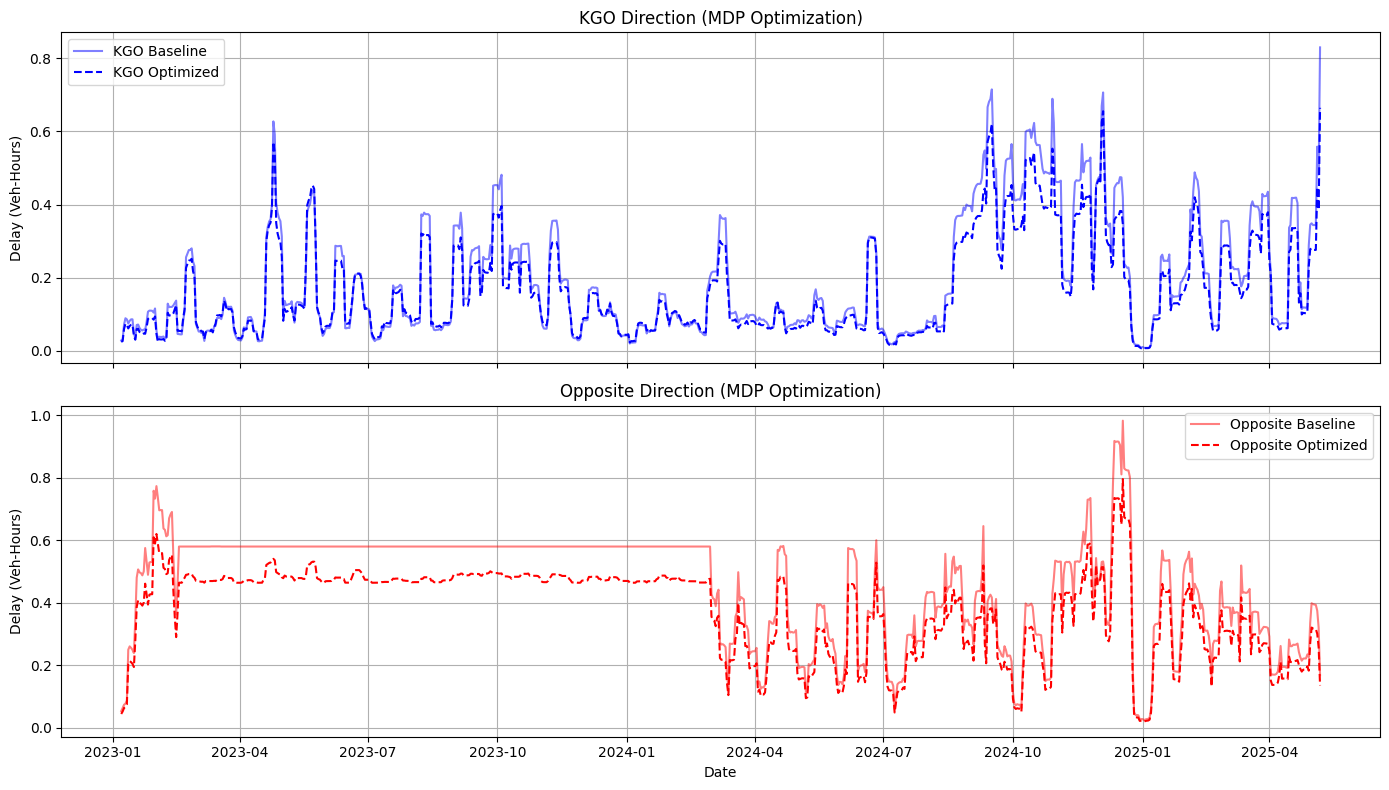

In [48]:
# Resample both baseline and optimized to daily means
KGO_daily_base = KGO.resample('D').mean()
KGO_daily_opt = KGO_sched.resample('D').mean()

oppo_daily_base = oppo_KGO.resample('D').mean()
oppo_daily_opt = oppo_sched.resample('D').mean()

# Apply 7-day rolling mean
KGO_daily_base['Rolling'] = KGO_daily_base['Delay (V_t=60) (Veh-Hours)'].rolling(7).mean()
KGO_daily_opt['Rolling'] = KGO_daily_opt['Delay (V_t=60) (Veh-Hours)'].rolling(7).mean()

oppo_daily_base['Rolling'] = oppo_daily_base['Delay (V_t=60) (Veh-Hours)'].rolling(7).mean()
oppo_daily_opt['Rolling'] = oppo_daily_opt['Delay (V_t=60) (Veh-Hours)'].rolling(7).mean()

# Plot
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# KGO direction
ax[0].plot(KGO_daily_base.index, KGO_daily_base['Rolling'], label='KGO Baseline', color='blue', alpha=0.5)
ax[0].plot(KGO_daily_opt.index, KGO_daily_opt['Rolling'], label='KGO Optimized', color='blue', linestyle='--')
ax[0].set_ylabel('Delay (Veh-Hours)')
ax[0].set_title('KGO Direction (MDP Optimization)')
ax[0].legend()
ax[0].grid(True)

# Opposite direction
ax[1].plot(oppo_daily_base.index, oppo_daily_base['Rolling'], label='Opposite Baseline', color='red', alpha=0.5)
ax[1].plot(oppo_daily_opt.index, oppo_daily_opt['Rolling'], label='Opposite Optimized', color='red', linestyle='--')
ax[1].set_ylabel('Delay (Veh-Hours)')
ax[1].set_xlabel('Date')
ax[1].set_title('Opposite Direction (MDP Optimization)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
